In [125]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [126]:
import tensorflow as tf

from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Set the image and batch sizes
image_size = (224, 224)
batch_size = 32

# Create an instance of the ResNet-50 model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [128]:
resnet_base.trainable = False

In [129]:
# Adding custom layers on top of ResNet50
x = resnet_base.output
x = GlobalAveragePooling2D()(x)  # Reduce the spatial dimensions
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Define the model
resnet_model = Model(inputs=resnet_base.input, outputs=predictions)

In [130]:
x_train = []
x_test = []
y_train = []
y_test = []

In [131]:
train_data_dir = '/Users/amanshastry/Desktop/Python/skin_cancer_detection/skin_cancer_data/train'
validation_data_dir = '/Users/amanshastry/Desktop/Python/skin_cancer_detection/skin_cancer_data/test'

In [132]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize pixel values between 0 and 1
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values between 0 and 1

In [133]:
# Load and preprocess the train images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Set the appropriate class_mode depending on your task
    subset='training'
)

# Load and preprocess the validation images
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',  # Set the appropriate class_mode depending on your task
    subset='validation'
)

# Load and preprocess the test images
test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'  # Set the appropriate class_mode depending on your task
)

Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [134]:
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [135]:
with tf.device("/GPU:0"):
    hist = resnet_model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        epochs = 20
    )

Epoch 1/20


/Users/amanshastry/anaconda3/envs/skin_cancer_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.5325 - loss: 0.9388 - val_accuracy: 0.5605 - val_loss: 0.6657
Epoch 2/20
 1/65 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.5625 - loss: 0.6595

/Users/amanshastry/anaconda3/envs/skin_cancer_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5625 - loss: 0.6595 - val_accuracy: 0.5586 - val_loss: 0.6832
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.5743 - loss: 0.6923 - val_accuracy: 0.5527 - val_loss: 0.6801
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5312 - loss: 0.6996 - val_accuracy: 0.5723 - val_loss: 0.6545
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.5845 - loss: 0.6728 - val_accuracy: 0.4512 - val_loss: 0.7262
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4375 - loss: 0.7227 - val_accuracy: 0.4492 - val_loss: 0.6806
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.5956 - loss: 0.6523 - val_accuracy: 0.4492 - val_loss: 0.7631
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2500 - loss: 0.9502 - val_accuracy: 0.6230 - val_loss: 0.6389
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.6005 - loss: 0.6573 - val_accuracy: 0.4551 - val_

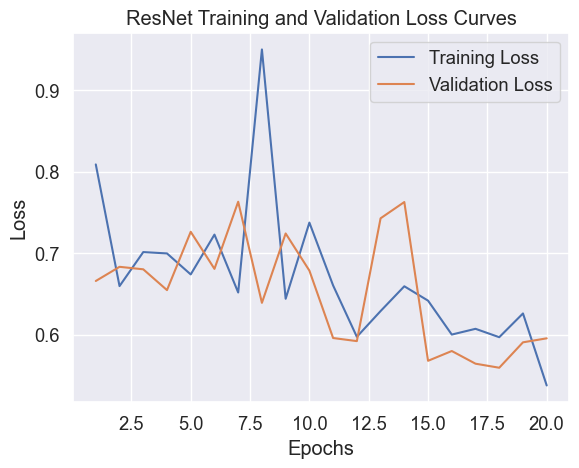

In [136]:
# Get the training and validation loss values from the history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Get the number of epochs
num_epochs = len(train_loss)

# Plot the training and validation loss curves
plt.plot(range(1, num_epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss, label='Validation Loss')

# Set the plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet Training and Validation Loss Curves')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [137]:
# Get predictions on the test data
resnet_predictions = resnet_model.predict(test_generator)

# Convert predicted probabilities to class labels
resnet_predicted_labels = [1 if pred >= 0.5 else 0 for pred in resnet_predictions]

# Print the predicted labels
print("ResNet Predicted Labels:", resnet_predicted_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step
ResNet Predicted Labels: [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 

In [138]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (optional, to prevent training the base layers)
vgg_base.trainable = False

In [139]:
# Adding custom layers on top of VGG16
x = vgg_base.output
x = GlobalAveragePooling2D()(x)  # Reduce the spatial dimensions
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Define the model
vgg_model = Model(inputs=vgg_base.input, outputs=predictions)

In [140]:
# Compile the model
vgg_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [141]:
with tf.device("/GPU:0"):
    hist = vgg_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs = 20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.6676 - loss: 0.5799 - val_accuracy: 0.7344 - val_loss: 0.5036
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7188 - loss: 0.5628 - val_accuracy: 0.7559 - val_loss: 0.4807
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.8076 - loss: 0.4550 - val_accuracy: 0.7832 - val_loss: 0.4517
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8750 - loss: 0.3655 - val_accuracy: 0.8008 - val_loss: 0.4498
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.8092 - loss: 0.4160 - val_accuracy: 0.7969 - val_loss: 0.4362
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9688 - loss: 0.1802 - val_accuracy: 0.8086 - val_loss: 0.4504
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.8187 - loss: 0.3835 - val_accuracy: 0.8105 - val_loss: 0.4333
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8125 - loss: 0.3617 - val_accuracy: 0.

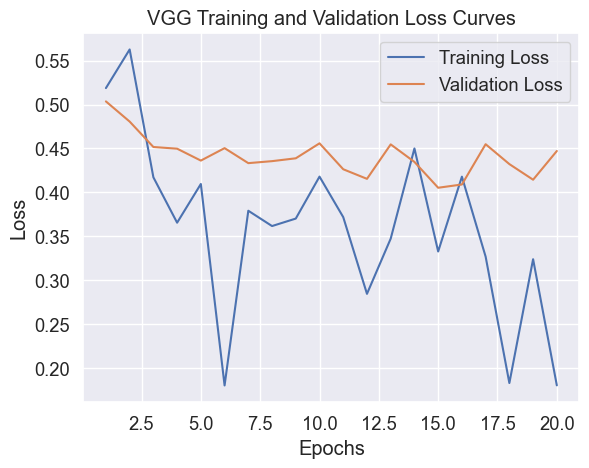

In [142]:
# Get the training and validation loss values from the history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Get the number of epochs
num_epochs = len(train_loss)

# Plot the training and validation loss curves
plt.plot(range(1, num_epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss, label='Validation Loss')

# Set the plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG Training and Validation Loss Curves')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [143]:
# Get predictions on the test data
vgg_predictions = vgg_model.predict(test_generator)

# Convert predicted probabilities to class labels
vgg_predicted_labels = [1 if pred >= 0.5 else 0 for pred in vgg_predictions]

# Print the predicted labels
print("VGG Predicted Labels:", vgg_predicted_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step
VGG Predicted Labels: [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 

In [144]:
actual_labels = []

for sub_dir in os.listdir(validation_data_dir):
  try:
    sub_paths = os.listdir(f'{validation_data_dir}/{sub_dir}')

  except:
    sub_paths = []

  for img_path in sub_paths:
    if sub_dir == 'malignant':
      actual_labels.append(0)
    elif sub_dir == 'benign':
      actual_labels.append(1)

In [145]:
def get_metrics(predicted_labels):
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels)
    recall = recall_score(actual_labels, predicted_labels)
    f1 = f1_score(actual_labels, predicted_labels)

    print(f'Acuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 score: {f1}')

In [146]:
print("Resnet: ")
get_metrics(resnet_predicted_labels)
print("VGG: ")
get_metrics(vgg_predicted_labels)

Resnet: 
Acuracy: 0.5015151515151515
Precision: 0.5351473922902494
Recall: 0.6555555555555556
F1 score: 0.5892634207240949
VGG: 
Acuracy: 0.47424242424242424
Precision: 0.5243445692883895
Recall: 0.3888888888888889
F1 score: 0.44657097288676234


In [163]:
weight_resnet = 0.3
weight_vgg = 0.7

ensemble_predictions = [int((res_pred * weight_resnet + vgg_pred * weight_vgg) >= 0.2) for res_pred, vgg_pred in zip(resnet_predicted_labels, vgg_predicted_labels)]

get_metrics(ensemble_predictions)

Acuracy: 0.509090909090909
Precision: 0.5342205323193916
Recall: 0.7805555555555556
F1 score: 0.6343115124153499


In [148]:
from sklearn import tree

In [149]:
training_files = os.listdir(f'{train_data_dir}')

img_list = []
x_train = np.array([])
y_train = []

for sub_dir in training_files:
  for file_name in os.listdir(f'{train_data_dir}/{sub_dir}'):
    img = cv2.imread(f'{train_data_dir}/{sub_dir}/{file_name}')
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_list.append(grey_image)
    # 0 if image is benign, 1 if malignant
    y_train.append(0 if sub_dir == 'benign' else 1)

img_list = np.array(img_list)

In [150]:
x_train = img_list.reshape(2637, (224*224))

df = pd.DataFrame(x_train)

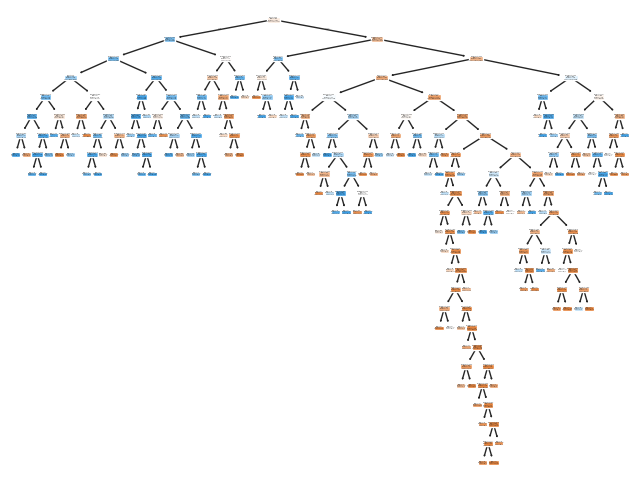

In [151]:
# Create an instance of the decision tree classifier
clf = tree.DecisionTreeClassifier(min_samples_leaf = 10)

# Train the decision tree model
clf.fit(x_train, y_train)

plt.figure(figsize=(8, 6))
tree.plot_tree(clf, filled=True)
plt.show()

In [152]:
importances = clf.feature_importances_
importances_list = importances.reshape(224, 224)

print(importances_list)

[[0.25069221 0.         0.         ... 0.         0.         0.05879425]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.05085787 0.         0.         ... 0.         0.         0.        ]]


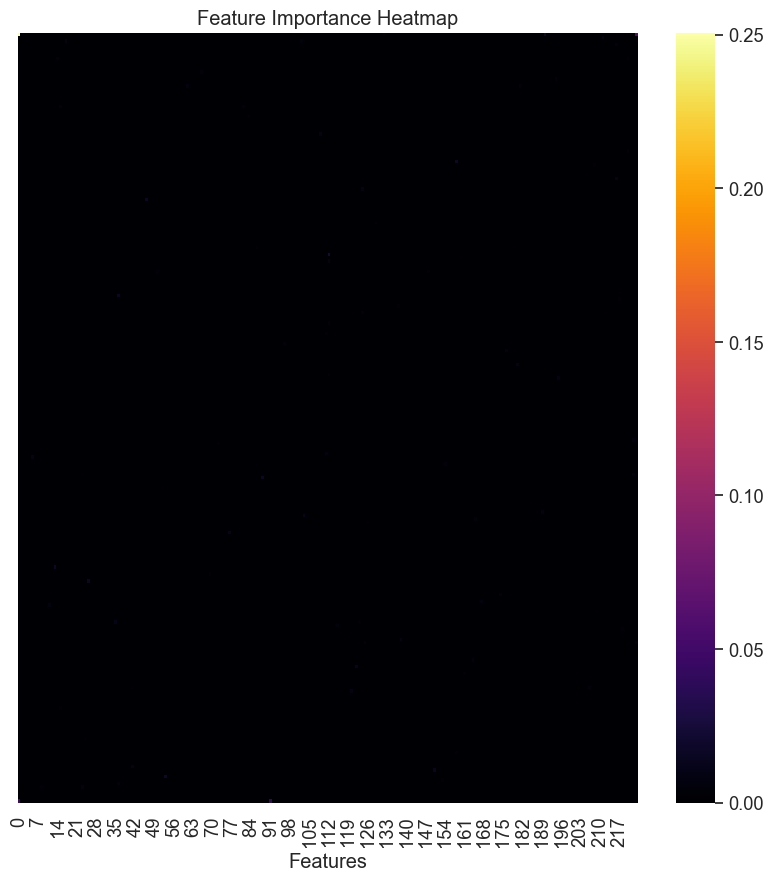

In [153]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(importances_list, cmap='inferno', annot = False, cbar=True, yticklabels=False)
plt.xlabel('Features')
plt.title('Feature Importance Heatmap')
plt.show()

In [154]:
x_test = np.array([])
y_test = []
test_img_list = []

for sub_dir in os.listdir(validation_data_dir):
  for file_name in os.listdir(f'{validation_data_dir}/{sub_dir}'):
    img = cv2.imread(f'{validation_data_dir}/{sub_dir}/{file_name}')
    grey_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_img_list.append(grey_image)
    # 0 if image is benign, 1 if malignant
    y_test.append(0 if sub_dir == 'benign' else 1)

test_img_list = np.array(test_img_list)

In [155]:
x_test = test_img_list.reshape(660, (224*224))

In [156]:
y_pred = clf.predict(x_test)

In [157]:
# f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Reall:", recall)
print("F1:", f1)

Accuracy: 0.7121212121212122
Precision: 0.6845637583892618
Reall: 0.68
F1: 0.6822742474916388
